## Homeless Encampments in LA

##### Spring 2025
##### Amanda Alonzo
##### I513 Usable AI
##### Indiana University, Bloomington
 


## Visualizations, Correlations

#### Prerequisite: 1_eda.ipynb

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import re
import numpy as np
import seaborn as sns

In [2]:
raw_data_path = "../Dataraw/"
annual_data_path = "../Datafiles/"
generated_data_path = "../Datagen/"

In [3]:
#this is generated at enf of 1_eda.ipynb
# it has some features added for dates and close time in days
#write to file with new features added for next notebook: visualization
df = pd.read_csv(generated_data_path+'homeless_camp_closed_all_ftr_eng_1.csv', low_memory=False)
df.head(1)

,SRNumber,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,CreatedByUserOrganization,MobileOS,...,CD,CDMember,NC,NCName,PolicePrecinct,ClosedDate_DT,CreatedDate_DT,close_time,close_time_days,CreatedDate_YR
0,1-1523590871,12/31/2019 11:26:00 PM,01/14/2020 07:52:00 AM,SR Created,BOS,Homeless Encampment,Closed,Mobile App,Self Service,iOS,...,3.0,Bob Blumenfield,13.0,CANOGA PARK NC,TOPANGA,2020-01-14 07:51:00,2019-12-31 11:26:00,13 days 20:25:00,13.0,2019


In [4]:
# Correlation hypothesis
df['close_time_days'].corr(df['CreatedDate_YR'])

np.float64(0.02242907035545966)

In [17]:
df.columns

Index(['SRNumber', 'CreatedDate', 'UpdatedDate', 'ActionTaken', 'Owner',
       'RequestType', 'Status', 'RequestSource', 'CreatedByUserOrganization',
       'MobileOS', 'Anonymous', 'AssignTo', 'ServiceDate', 'ClosedDate',
       'AddressVerified', 'ApproximateAddress', 'Address', 'HouseNumber',
       'Direction', 'StreetName', 'Suffix', 'ZipCode', 'Latitude', 'Longitude',
       'Location', 'TBMPage', 'TBMColumn', 'TBMRow', 'APC', 'CD', 'CDMember',
       'NC', 'NCName', 'PolicePrecinct', 'ClosedDate_DT', 'CreatedDate_DT',
       'close_time', 'close_time_days', 'CreatedDate_YR'],
      dtype='object')

In [20]:
# top volumes by police precent
df.groupby("PolicePrecinct").count().sort_values(by='PolicePrecinct', ascending=False)

,SRNumber,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,CreatedByUserOrganization,MobileOS,...,APC,CD,CDMember,NC,NCName,ClosedDate_DT,CreatedDate_DT,close_time,close_time_days,CreatedDate_YR
PolicePrecinct,,,,,,,,,,,,,,,,,,,,,
WILSHIRE,17944,17944,17944,17944,17944,17944,17944,17944,14919,9360,...,17944,17944,17944,17918,17918,17942,17944,17942,17942,17944
WEST VALLEY,11935,11935,11935,11935,11935,11935,11935,11935,10072,5930,...,11935,11935,11935,11935,11935,11934,11935,11934,11934,11935
WEST LOS ANGELES,15085,15085,15085,15085,15085,15085,15085,15085,12740,7299,...,15085,15084,15085,14408,14408,15081,15085,15081,15081,15085
VAN NUYS,14263,14263,14263,14263,14263,14263,14263,14263,12198,8097,...,14263,14263,14263,14056,14056,14263,14263,14263,14263,14263
TOPANGA,18573,18573,18573,18573,18573,18573,18573,18573,15887,11142,...,18573,18573,18573,18572,18572,18566,18573,18566,18566,18573
SOUTHWEST,8348,8348,8348,8348,8348,8348,8348,8348,7001,3488,...,8348,8348,8348,8348,8348,8347,8348,8347,8347,8348
SOUTHEAST,7489,7489,7489,7489,7489,7489,7489,7489,6391,3698,...,7489,7489,7489,7336,7336,7487,7489,7487,7487,7489
RAMPART,21972,21972,21972,21972,21972,21972,21972,21972,19679,12231,...,21972,21972,21972,21972,21972,21969,21972,21969,21969,21972
PACIFIC,26461,26461,26461,26461,26461,26461,26461,26461,22354,14663,...,26461,26461,26461,26461,26461,26456,26461,26456,26456,26461


In [5]:
# top volumes by neighborhood
df.groupby("APC").count().sort_values(by='APC', ascending=False)

,SRNumber,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,CreatedByUserOrganization,MobileOS,...,CD,CDMember,NC,NCName,PolicePrecinct,ClosedDate_DT,CreatedDate_DT,close_time,close_time_days,CreatedDate_YR
APC,,,,,,,,,,,,,,,,,,,,,
West Los Angeles APC,39794,39794,39794,39794,39794,39794,39794,39794,33628,21107,...,39793,39794,39117,39117,39794,39785,39794,39785,39785,39794
South Valley APC,66115,66115,66115,66115,66115,66115,66115,66115,56674,37608,...,66115,66115,65906,65906,66115,66108,66115,66108,66108,66115
South Los Angeles APC,47439,47439,47439,47439,47439,47439,47439,47439,40330,21206,...,47439,47438,46856,46856,47439,47426,47439,47426,47426,47439
North Valley APC,45805,45805,45805,45805,45805,45805,45805,45805,37713,21496,...,45805,45805,45805,45805,45805,45763,45805,45763,45763,45805
Harbor APC,6859,6859,6859,6859,6859,6859,6859,6859,5874,3400,...,6859,6859,6618,6618,6859,6859,6859,6859,6859,6859
East Los Angeles APC,23753,23753,23753,23753,23753,23753,23753,23753,20469,12134,...,23753,23753,23658,23658,23753,23753,23753,23753,23753,23753
Central APC,92140,92140,92140,92140,92140,92140,92140,92140,79092,49386,...,92139,92140,92129,92129,92140,92124,92140,92124,92124,92140


## Feature Engineering - Numeric

In [6]:
df['APC'].unique()

array(['South Valley APC', 'Central APC', 'South Los Angeles APC',
       'North Valley APC', 'West Los Angeles APC', 'East Los Angeles APC',
       'Harbor APC', nan], dtype=object)

In [7]:
df['is_east_la'] = df.apply(lambda row: row['APC']=='East Los Angeles APC', axis=1)
df['is_east_la']  = df['is_east_la'].replace(True, 1)
df['is_east_la']  = df['is_east_la'].replace(False, 0)
df['is_east_la'].value_counts()

C:\Users\amand\AppData\Local\Temp\ipykernel_130936\3076755490.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_east_la']  = df['is_east_la'].replace(False, 0)


is_east_la
0    298433
1     23753
Name: count, dtype: int64

In [8]:
df['is_north_valley'] = df.apply(lambda row: row['APC']=='North Valley APC', axis=1)
df['is_north_valley']  = df['is_north_valley'].replace(True, 1)
df['is_north_valley']  = df['is_north_valley'].replace(False, 0)
df['is_north_valley'].value_counts()

C:\Users\amand\AppData\Local\Temp\ipykernel_130936\3787203939.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_north_valley']  = df['is_north_valley'].replace(False, 0)


is_north_valley
0    276381
1     45805
Name: count, dtype: int64

In [9]:
df['is_south_la'] = df.apply(lambda row: row['APC']=='South Los Angeles APC', axis=1)
df['is_south_la']  = df['is_south_la'].replace(True, 1)
df['is_south_la']  = df['is_south_la'].replace(False, 0)
df['is_south_la'].value_counts()

C:\Users\amand\AppData\Local\Temp\ipykernel_130936\3057214533.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_south_la']  = df['is_south_la'].replace(False, 0)


is_south_la
0    274747
1     47439
Name: count, dtype: int64

In [10]:
df['is_west_la'] = df.apply(lambda row: row['APC']=='West Los Angeles APC', axis=1)
df['is_west_la']  = df['is_west_la'].replace(True, 1)
df['is_west_la']  = df['is_west_la'].replace(False, 0)
df['is_west_la'].value_counts()

C:\Users\amand\AppData\Local\Temp\ipykernel_130936\3653705705.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_west_la']  = df['is_west_la'].replace(False, 0)


is_west_la
0    282392
1     39794
Name: count, dtype: int64

In [11]:
df['is_central'] = df.apply(lambda row: row['APC']=='Central APC', axis=1)
df['is_central']  = df['is_central'].replace(True, 1)
df['is_central']  = df['is_central'].replace(False, 0)
df['is_central'].value_counts()

C:\Users\amand\AppData\Local\Temp\ipykernel_130936\3131909513.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_central']  = df['is_central'].replace(False, 0)


is_central
0    230046
1     92140
Name: count, dtype: int64

In [12]:
df['is_harbor'] = df.apply(lambda row: row['APC']=='Harbor APC', axis=1)
df['is_harbor']  = df['is_harbor'].replace(True, 1)
df['is_harbor']  = df['is_harbor'].replace(False, 0)
df['is_harbor'].value_counts()

C:\Users\amand\AppData\Local\Temp\ipykernel_130936\997261444.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_harbor']  = df['is_harbor'].replace(False, 0)


is_harbor
0    315327
1      6859
Name: count, dtype: int64

In [13]:
df['is_south_valley'] = df.apply(lambda row: row['APC']=='South Valley APC', axis=1)
df['is_south_valley']  = df['is_south_valley'].replace(True, 1)
df['is_south_valley']  = df['is_south_valley'].replace(False, 0)
df['is_south_valley'].value_counts()

C:\Users\amand\AppData\Local\Temp\ipykernel_130936\1825823131.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_south_valley']  = df['is_south_valley'].replace(False, 0)


is_south_valley
0    256071
1     66115
Name: count, dtype: int64

## Correlation Visualizations

In [22]:
numeric_variables = df.select_dtypes(include=np.number)
numeric_variables = numeric_variables.loc[:,'close_time_days':'is_south_valley']
numeric_variables.head(1)  

,close_time_days,CreatedDate_YR,is_east_la,is_north_valley,is_south_la,is_west_la,is_central,is_harbor,is_south_valley
0,13.0,2019,0,0,0,0,0,0,1


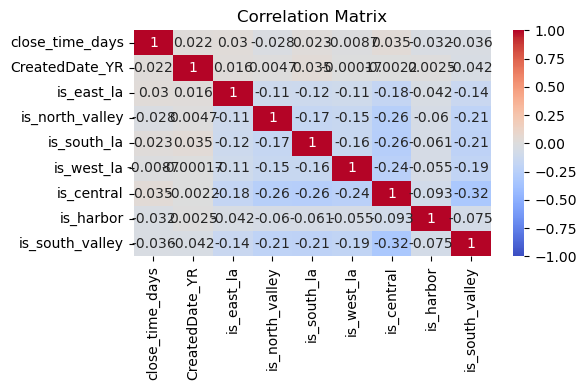

In [23]:
# Correlation heatmap
correlation_table = numeric_variables.corr()
correlation_table

# Create heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_table, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [ ]:
df_recent=df[df['CreatedDate_YR']=='2023']
sns.set_theme(font_scale=0.75)  # Set the font scale to reduce the font size
sns.pairplot(df_recent, hue='APC', height=1.5, markers='.', plot_kws={'s': 30}) 
plt.show()